In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
newdf = df[['Children', 'StreamingTV', 'StreamingMovies', 'Tablet', 'Phone', 'Bandwidth_GB_Year', 'Churn']]
print (newdf)

print('Original data set:')
print(df.describe())

      Children StreamingTV StreamingMovies Tablet Phone  Bandwidth_GB_Year  \
0            0          No             Yes    Yes   Yes         904.536110   
1            1         Yes             Yes    Yes   Yes         800.982766   
2            4          No             Yes     No   Yes        2054.706961   
3            1         Yes              No     No   Yes        2164.579412   
4            0         Yes              No     No    No         271.493436   
...        ...         ...             ...    ...   ...                ...   
9995         3          No              No    Yes   Yes        6511.252601   
9996         4         Yes              No     No   Yes        5695.951810   
9997         1          No              No     No   Yes        4159.305799   
9998         1         Yes             Yes    Yes    No        6468.456752   
9999         1          No             Yes     No   Yes        5857.586167   

     Churn  
0       No  
1      Yes  
2       No  
3       No 

In [4]:
def replace_yes_no(df):
    # Replace the "yes" and "no" values with 1 and 0
    mapping = {'yes': 1, 'no': 0}
    columns = ['StreamingTV', 'StreamingMovies', 'Tablet', 'Phone', 'Churn']
    df_replaced = newdf.replace({col: mapping for col in columns})
    
    # Convert the values in the specified columns to integers or floats
    df_converted = df_replaced.apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Convert the values in the "Children" column to integers or floats
    df_converted['Children'] = pd.to_numeric(df_converted['Children'], errors='coerce')
    
    return df_converted

In [5]:
zscoredf = replace_yes_no(newdf)
zscoredf = zscoredf.astype(float)


z_scores = zscore(zscoredf)

# Create a boolean mask to identify observations with a high z-score
mask = (abs(z_scores) > 3).any(axis=1)

# Filter the DataFrame to remove observations with a high z-score
df_cleaned = newdf[~mask]

print('\nCleaned data set:')
print(df_cleaned.describe())


Cleaned data set:
          Children  Bandwidth_GB_Year
count  9809.000000        9809.000000
mean      1.943012        3388.681265
std       1.897161        2185.231124
min       0.000000         155.506715
25%       0.000000        1234.044483
50%       1.000000        3293.015758
75%       3.000000        5581.981954
max       8.000000        7158.981530


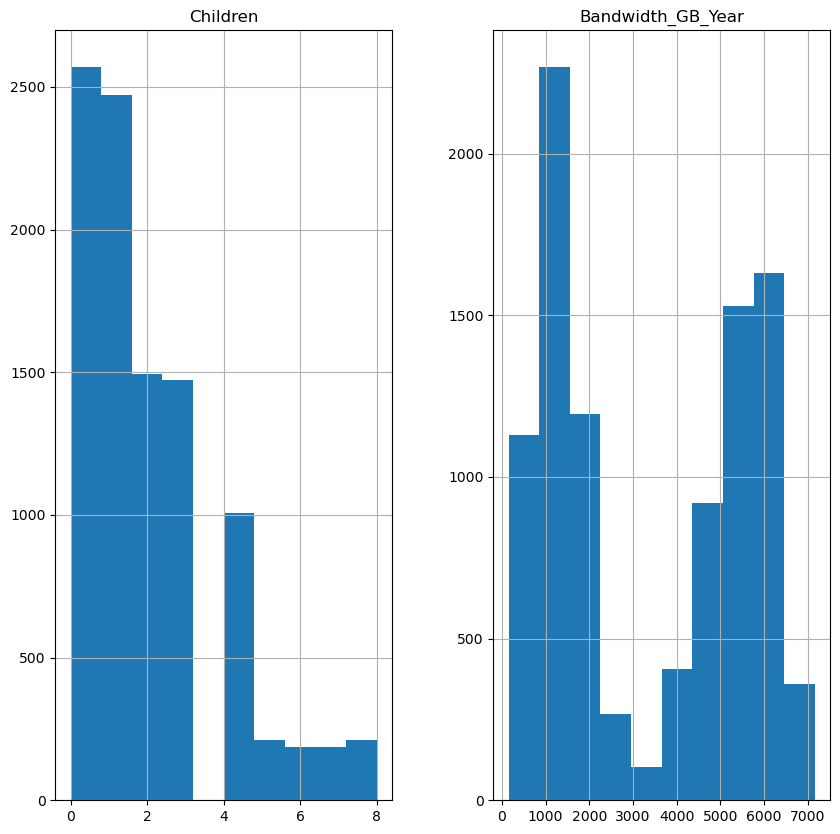

In [6]:
df_cleaned.hist(figsize=(10, 10))
plt.subplots_adjust(hspace=1.0)

plt.show()

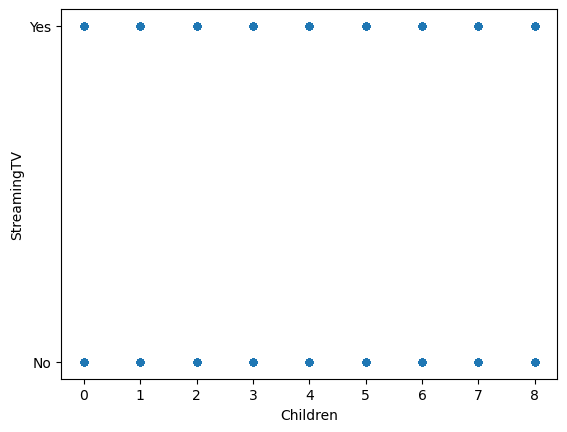

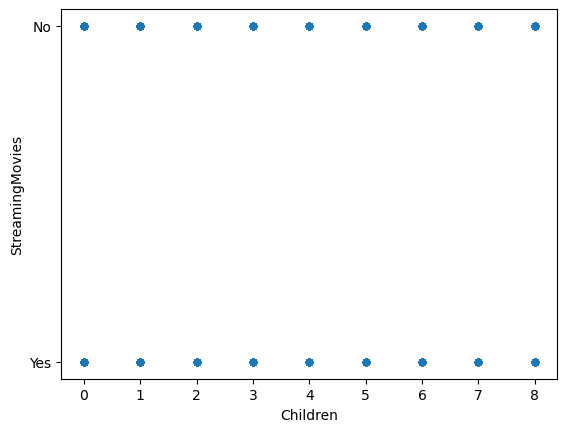

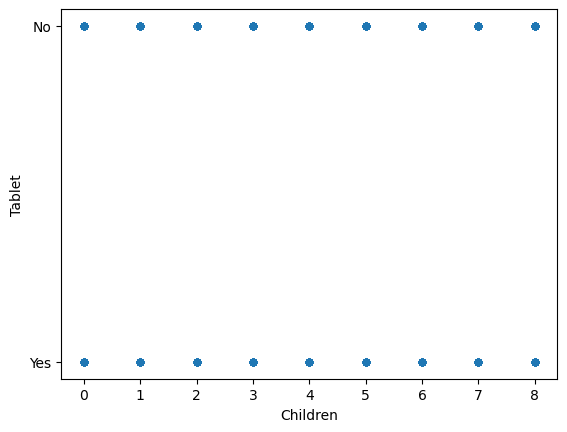

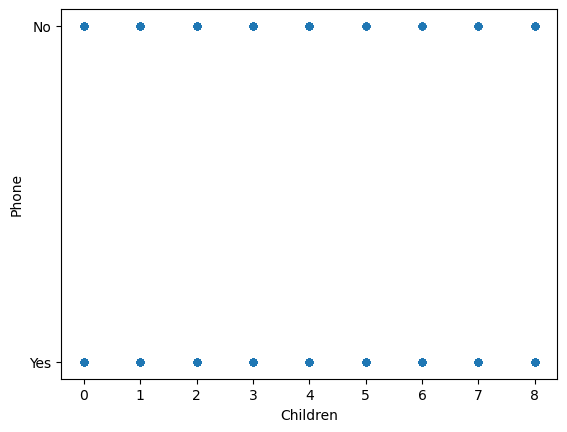

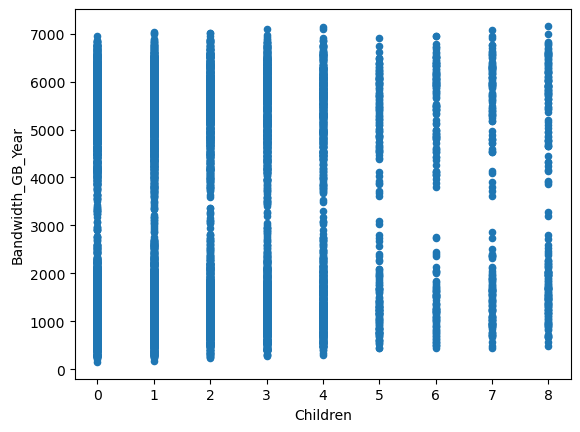

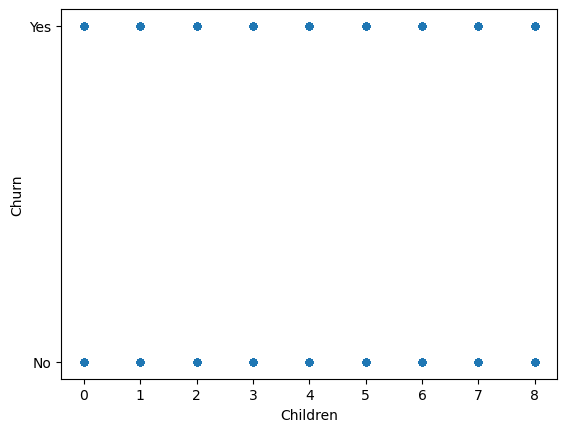

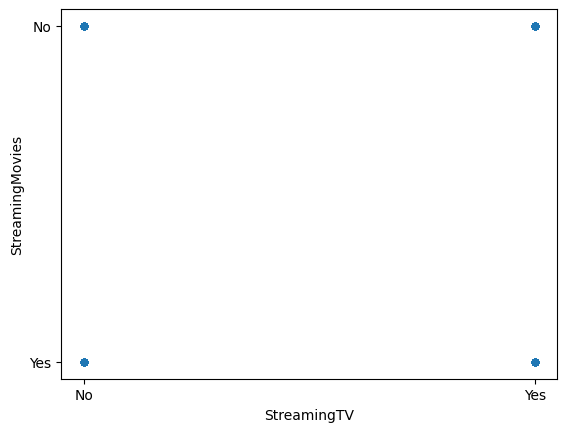

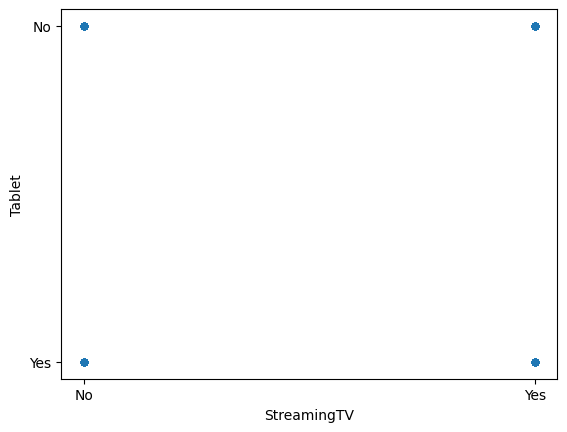

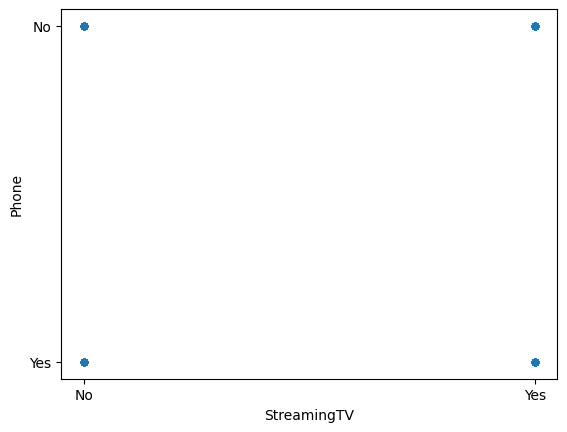

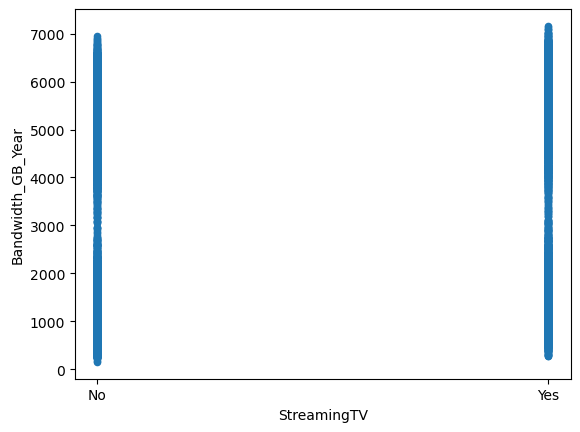

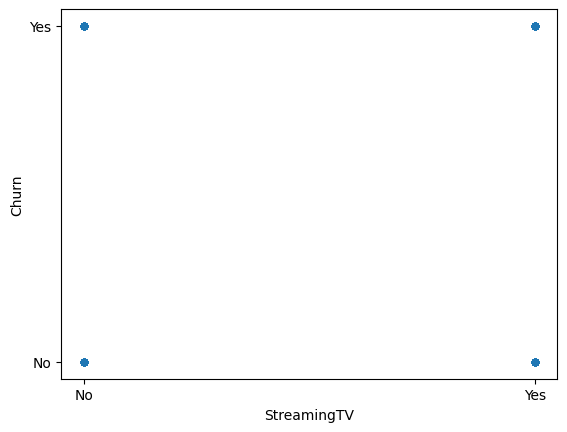

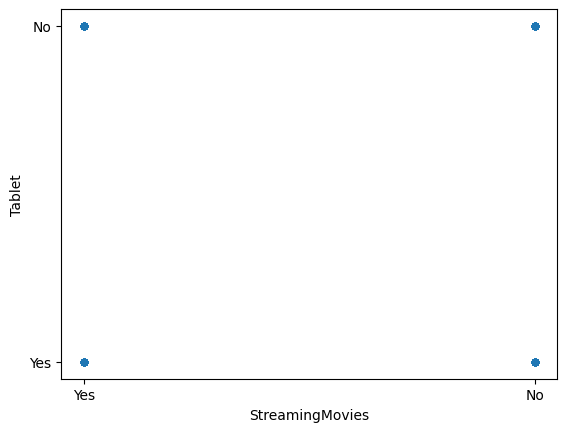

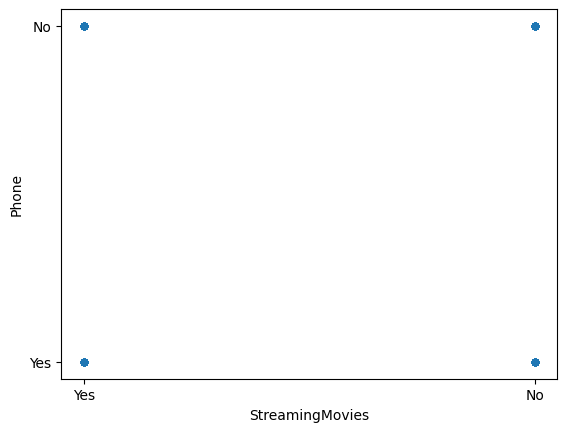

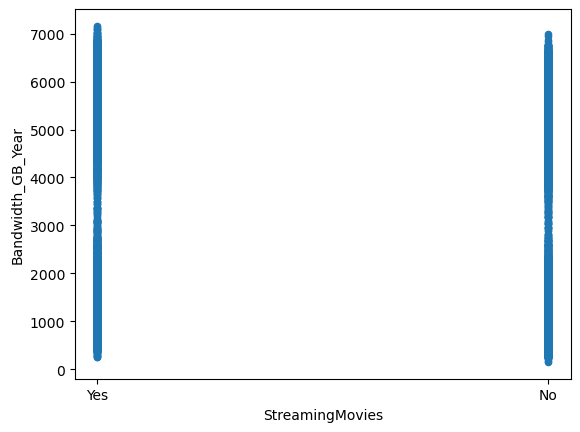

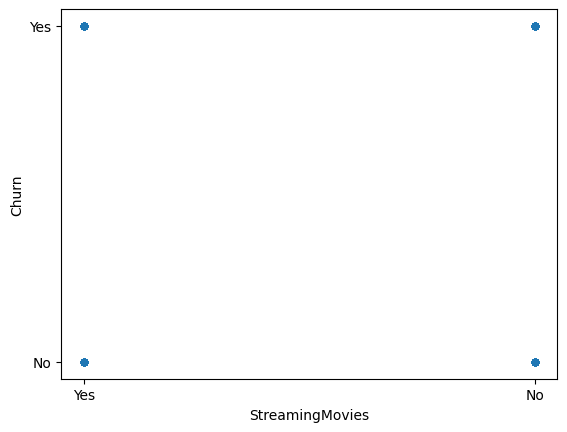

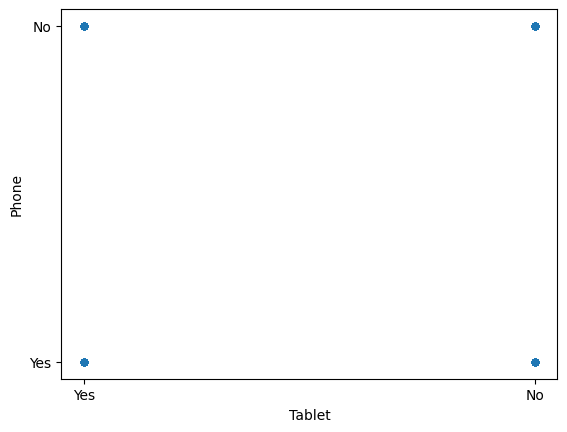

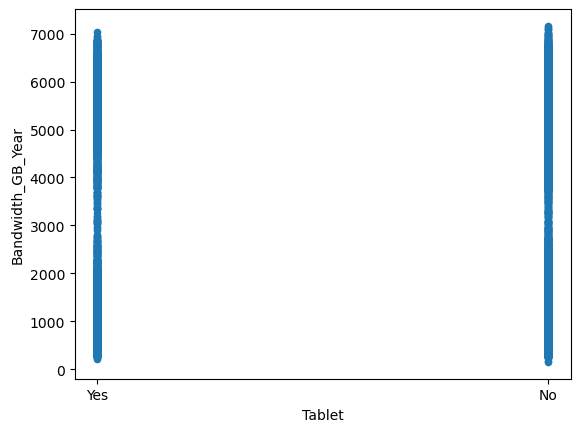

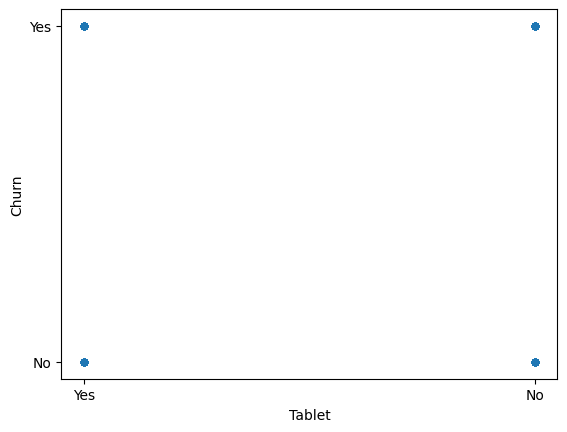

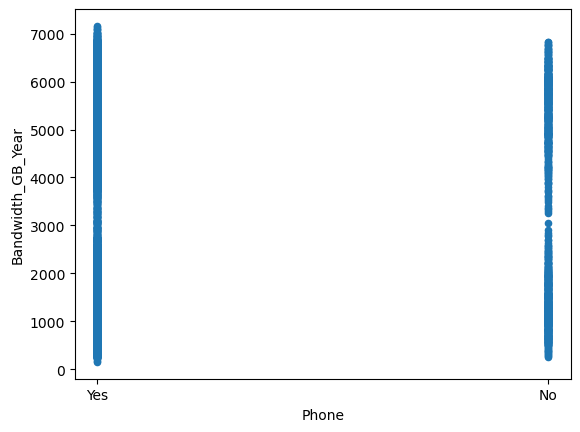

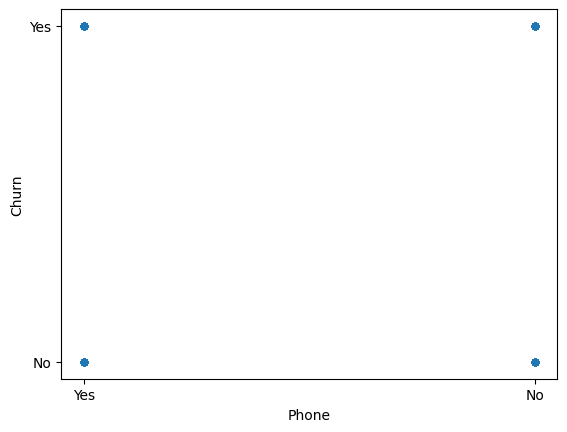

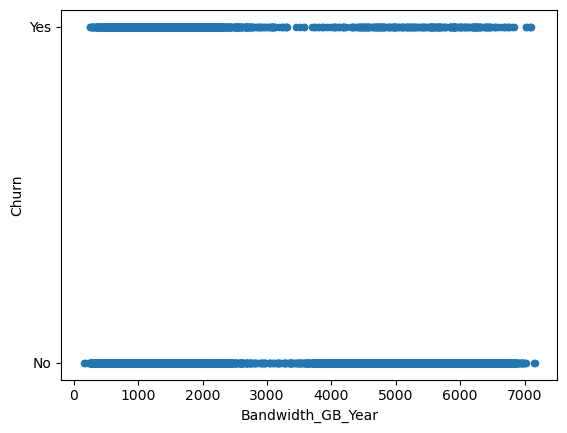

In [7]:
columns = ['Children', 'StreamingTV', 'StreamingMovies', 'Tablet', 'Phone', 'Bandwidth_GB_Year', 'Churn']
df_selected = df_cleaned[columns]

# Generate a scatter plot for each pair of columns in the selected DataFrame
for i, column1 in enumerate(df_selected.columns):
    for j, column2 in enumerate(df_selected.columns):
        if i < j:
            df_selected.plot(x=column1, y=column2, kind='scatter')
            
            # Adjust the spacing between the subplots
            plt.subplots_adjust(wspace=0.5)
            
            plt.show()

In [8]:
model = smf.ols(formula='Bandwidth_GB_Year ~ Children + StreamingTV + StreamingMovies + Tablet + Phone + Churn', data=df_cleaned).fit()


In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     576.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:27:08   Log-Likelihood:                -87861.
No. Observations:                9809   AIC:                         1.757e+05
Df Residuals:                    9802   BIC:                         1.758e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3309

In [10]:
if model.f_pvalue < 0.05:
    print("At least one of the variables contributes to the variance of Bandwidth_GB_Year.")
else:
    print("None of the variables contribute to the variance of Bandwidth_GB_Year.")

At least one of the variables contributes to the variance of Bandwidth_GB_Year.


In [11]:
# Get the p-values for each variable in the model
pvalues = model.pvalues

# Set the threshold for significance
threshold = 0.05

# Print the names of the variables that have a p-value less than the threshold
for variable, pvalue in pvalues.items():
    if pvalue < threshold:
        print(f"{variable} contributes to the variance of Bandwidth_GB_Year.\n")

Intercept contributes to the variance of Bandwidth_GB_Year.

StreamingTV[T.Yes] contributes to the variance of Bandwidth_GB_Year.

StreamingMovies[T.Yes] contributes to the variance of Bandwidth_GB_Year.

Churn[T.Yes] contributes to the variance of Bandwidth_GB_Year.

Children contributes to the variance of Bandwidth_GB_Year.



In [12]:
significant_variables = []
threshold = 0.05
for variable, pvalue in model.pvalues.items():
    if pvalue < threshold:
        significant_variables.append(variable)
print(significant_variables)


['Intercept', 'StreamingTV[T.Yes]', 'StreamingMovies[T.Yes]', 'Churn[T.Yes]', 'Children']


In [13]:
formula = 'Bandwidth_GB_Year ~ C(StreamingTV, levels=["No", "Yes"]) + C(StreamingMovies, levels=["No", "Yes"]) + C(Churn, levels=["No", "Yes"]) + Children'

In [14]:
reduced_model = smf.ols(formula=formula, data=df_cleaned).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     864.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:27:08   Log-Likelihood:                -87863.
No. Observations:                9809   AIC:                         1.757e+05
Df Residuals:                    9804   BIC:                         1.758e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [15]:
reduced_model = smf.ols(formula=formula, data=df_cleaned).fit()


In [16]:
residuals = reduced_model.resid


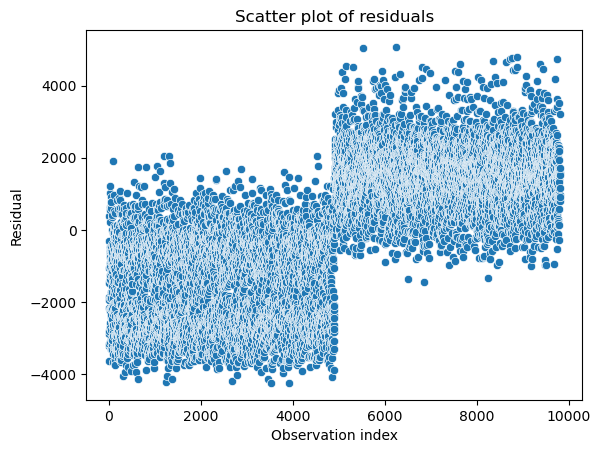

In [17]:
sns.scatterplot(x=range(len(residuals)), y=residuals)
plt.xlabel('Observation index')
plt.ylabel('Residual')
plt.title('Scatter plot of residuals')
plt.show()

In [18]:
# Get the coefficients of the independent variables
coef = model.params

# Get the names of the independent variables
ind_vars = model.model.exog_names

# Create an empty list to store the variables in the equation
equation = []

In [19]:
# Iterate through the coefficients and variable names
for i in range(len(coef)):
    if i == 0:
        equation.append(f"{coef[i]:.3f}")
    else:
        equation.append(f"{coef[i]:.3f}*{ind_vars[i]}")

In [20]:
# Print the equation in a readable format
print(" + ".join(equation))

3309.826 + 795.744*StreamingTV[T.Yes] + 898.641*StreamingMovies[T.Yes] + -32.158*Tablet[T.Yes] + -88.250*Phone[T.Yes] + -2691.656*Churn[T.Yes] + 26.405*Children


In [21]:
# Extract the coefficients from the model
coef = model.params

# Build the equation using the coefficients
equation = "y = {}x".format(coef[1])
for i, c in enumerate(coef[2:]):
    equation += " + {}x{}".format(c, i + 2)

# Add the constant term to the equation
equation += " + {}".format(coef[0])

# Print the equation in a readable format
print(equation)


y = 795.7437695585047x + 898.6409013041539x2 + -32.158128076670174x3 + -88.25027263256412x4 + -2691.6557296432356x5 + 26.40504628673819x6 + 3309.8256844352272


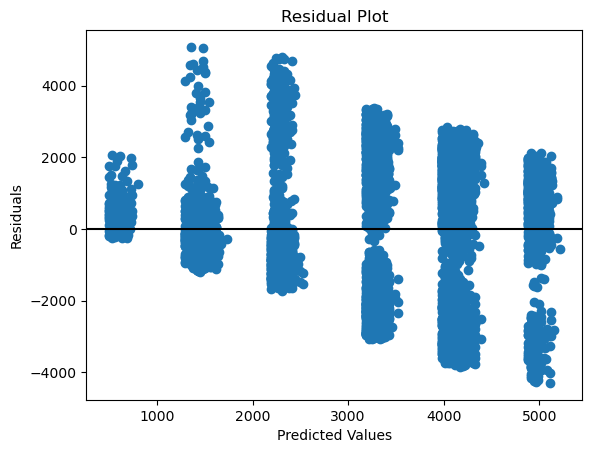

In [22]:
import matplotlib.pyplot as plt

# Get the residuals from the model
residuals = model.resid

# Plot the residuals
plt.scatter(model.predict(), residuals)
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.title('Residual Plot')
plt.show()
